- ROC Curve, CM, F1-Score and other metric

In [1]:
from datamodule import Dataset
from trainer import Trainer
from models import *
from utils import *
import warnings
warnings.filterwarnings("ignore")

## Plain 

Train Accuracy:  0.9775428771972656
Test Accuracy:  0.978600025177002
              precision    recall  f1-score   support

           0      0.990     0.988     0.989      1551
           1      0.996     0.992     0.994      1468
           2      0.982     0.984     0.983      1505
           3      0.893     0.984     0.937      1465
           4      0.977     0.978     0.978      1483
           5      0.987     0.908     0.946      1592
           6      0.997     0.982     0.990      1536
           7      0.985     0.986     0.985      1462
           8      0.990     0.999     0.994      1484
           9      0.996     0.989     0.992      1454

    accuracy                          0.979     15000
   macro avg      0.979     0.979     0.979     15000
weighted avg      0.980     0.979     0.979     15000



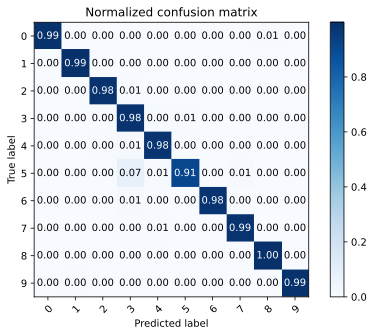

In [20]:
dataset = Dataset(path = './data/dataset1.csv')

# model = KNN(k = 5)
model = GNB()
# model = LR()

model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)

# Scaled Dataset

In [ ]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the input data and transform it
normalized_X = scaler.fit_transform(dataset.X)
dataset = Dataset(X = normalized_X, y = dataset.y) 
model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)

# Hyperparameter Seach

In [ ]:
grid_search = GridSearchCV(model.clf, model.param_grid, cv=5, scoring='accuracy')
grid_search.fit(dataset.X_train, dataset.y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
model = grid_search.best_estimator_
model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)

# My Softmax Regression

Accuracy: 0.9834666848182678
Train Accuracy:  0.9801428318023682
Test Accuracy:  0.9834666848182678
              precision    recall  f1-score   support

           0      0.994     0.993     0.994      1551
           1      1.000     0.983     0.991      1468
           2      0.987     0.989     0.988      1505
           3      0.975     0.939     0.957      1465
           4      0.985     0.981     0.983      1483
           5      0.974     0.960     0.967      1592
           6      0.968     0.998     0.983      1536
           7      0.978     0.995     0.986      1462
           8      0.991     0.999     0.995      1484
           9      0.984     0.997     0.991      1454

    accuracy                          0.983     15000
   macro avg      0.984     0.984     0.983     15000
weighted avg      0.984     0.983     0.983     15000



<Figure size 500x400 with 0 Axes>

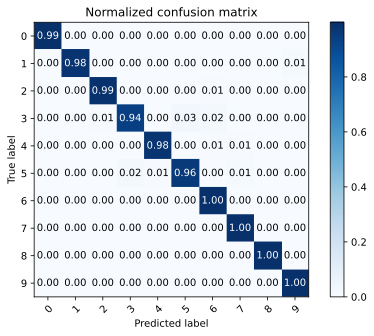

In [18]:
torch.manual_seed(33)
dataset = Dataset(path = './data/dataset1.csv')
trainer = Trainer(max_epochs = 2)
model = SoftmaxRegression(num_features = dataset.num_features, num_classes = dataset.num_classes, lr = 0.01, lambda_ = 0.15)
trainer.fit(model = model, data = dataset)
evaluate(model,dataset)